###**Weather**
This project about the location of weather stations in Canada.   DBSCAN can be used here, for instance, to find the group of stations which show the same weather condition.  

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [0]:
df = pd.read_csv("weather.csv", delimiter=",")

In [0]:
df.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


**Data Signification**

Stn_Name:Station Name

Lat:Latitude (North+, degrees)

Long:Longitude (West - , degrees)

Prov:Province

Tm:Mean Temperature (°C)
DwTm:Days without Valid Mean Temperature

D	Mean:Temperature difference from Normal (1981-2010) (°C)

Tx:Highest Monthly Maximum Temperature (°C)

DwTx:Days without Valid Maximum Temperature

Tn:Lowest Monthly Minimum Temperature (°C)

DwTn:Days without Valid Minimum Temperature

S:Snowfall (cm)

DwS:Days without Valid Snowfall

S%N:Percent of Normal (1981-2010) Snowfall

P:Total Precipitation (mm)

DwP:Days without Valid Precipitation

P%N:Percent of Normal (1981-2010) Precipitation

S_G:Snow on the ground at the end of the month (cm)

Pd:Number of days with Precipitation 1.0 mm or more

BS:Bright Sunshine (hours)

DwBS:Days without Valid Bright Sunshine

BS%:Percent of Normal (1981-2010) Bright Sunshine

HDD:Degree Days below 18 °C

CDD:Degree Days above 18 °C

Stn_No:Climate station identifier (first 3 digits indicate drainage basin, last 4 characters are for sorting alphabetically).
 

In [0]:
df.dtypes

Stn_Name     object
Lat         float64
Long        float64
Prov         object
Tm          float64
DwTm        float64
D           float64
Tx          float64
DwTx        float64
Tn          float64
DwTn        float64
S           float64
DwS         float64
S%N         float64
P           float64
DwP         float64
P%N         float64
S_G         float64
Pd          float64
BS          float64
DwBS        float64
BS%         float64
HDD         float64
CDD         float64
Stn_No       object
dtype: object

In [0]:
df.describe

<bound method NDFrame.describe of                     Stn_Name     Lat     Long Prov  ...  BS%     HDD  CDD   Stn_No
0                  CHEMAINUS  48.935 -123.742   BC  ...  NaN   273.3  0.0  1011500
1     COWICHAN LAKE FORESTRY  48.824 -124.133   BC  ...  NaN   307.0  0.0  1012040
2              LAKE COWICHAN  48.829 -124.052   BC  ...  NaN   168.1  0.0  1012055
3           DISCOVERY ISLAND  48.425 -123.226   BC  ...  NaN     NaN  NaN  1012475
4        DUNCAN KELVIN CREEK  48.735 -123.728   BC  ...  NaN   267.7  0.0  1012573
...                      ...     ...      ...  ...  ...  ...     ...  ...      ...
1336                  NAIN A  56.550  -61.683   NL  ...  NaN  1136.5  0.0  8502800
1337                  NAIN A  56.551  -61.682   NL  ...  NaN   148.7  0.0  8502801
1338                  SAGLEK  58.333  -62.586   NL  ...  NaN  1101.2  0.0  8503249
1339            TUKIALIK BAY  54.716  -58.358   NL  ...  NaN  1060.0  0.0  8503992
1340                WABUSH A  52.923  -66.865   NL  .

Cleaning

In [0]:
df = df[pd.notnull(df["Tm"])].reset_index(drop=True)
df.head(5)
df = df[pd.notnull(df["Tn"])].reset_index(drop=True)
df.head(5)
df = df[pd.notnull(df["Tx"])].reset_index(drop=True)
df.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,xm,ym
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500,1.807806e+06,1.396332e+06
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040,1.764329e+06,1.377564e+06
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055,1.773336e+06,1.378409e+06
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573,1.809363e+06,1.362546e+06
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,0.0,NaN,NaN,NaN,81.0,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710,1.841498e+06,1.311615e+06


Data Visualization

In [0]:
!apt install proj-bin libproj-dev libgeos-dev


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
! pip install -U git+https://github.com/matplotlib/basemap.git

  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-y9a8by0v
  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-y9a8by0v
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756019 sha256=8f70edf3ed36fb3b229745d0a84eac1aef56147ad3e7c79f4b75727b5e0a364f
  Stored in directory: /tmp/pip-ephem-wheel-cache-dk4brmpf/wheels/3f/f3/56/de548b66967d0d661612b7618022e2c0d4b86b9a638cf6ccf3
Successfully built basemap
  Found existing installation: basemap 1.2.1
    Uninstalling basemap-1.2.1:
      Successfully uninstalled basemap-1.2.1


In [0]:
from mpl_toolkits.basemap import Basemap

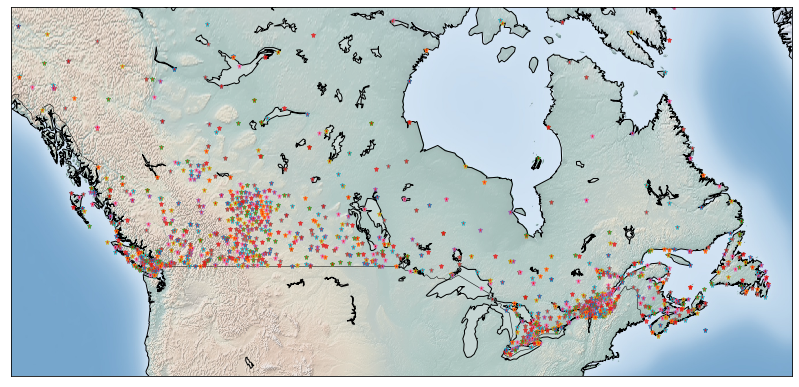

In [0]:
rcParams['figure.figsize'] = (14,13)

llon=-140
ulon=-50
llat=40
ulat=65

df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) &(df['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
df['xm']= xs.tolist()
df['ym'] =ys.tolist()

#Visualization1
for index,row in df.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='*', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()



Text(0.5, 1.0, 'Distribution of Mean Temperature')

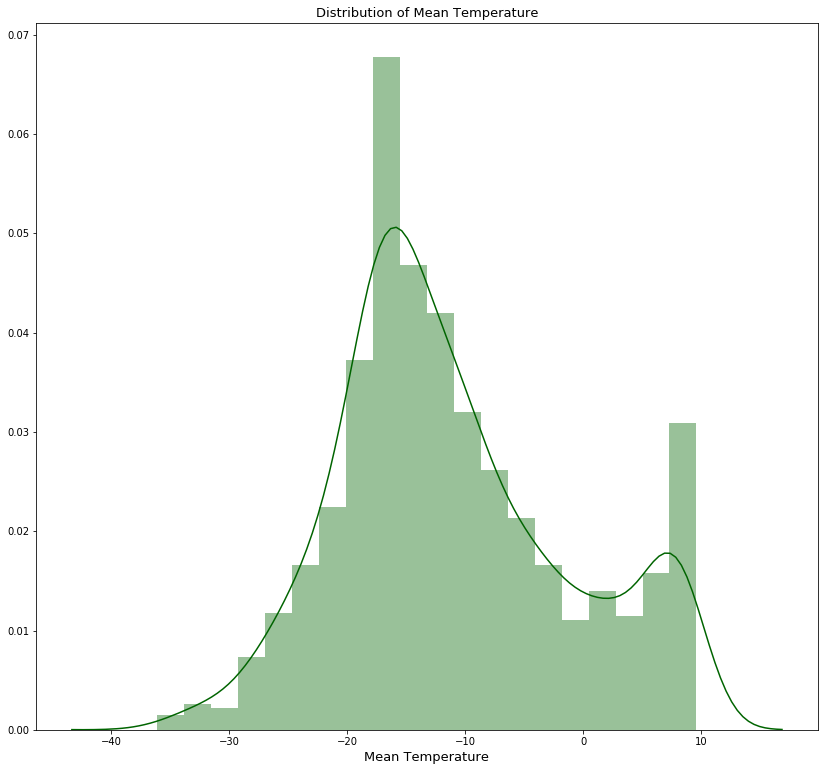

In [0]:
sns.distplot(df['Tm'], color='darkgreen', kde=True)
plt.xlabel('Mean Temperature' , fontsize=13)
plt.title("Distribution of Mean Temperature", fontsize=13)

Text(0.5, 1.0, 'Distribution of Min Temperature')

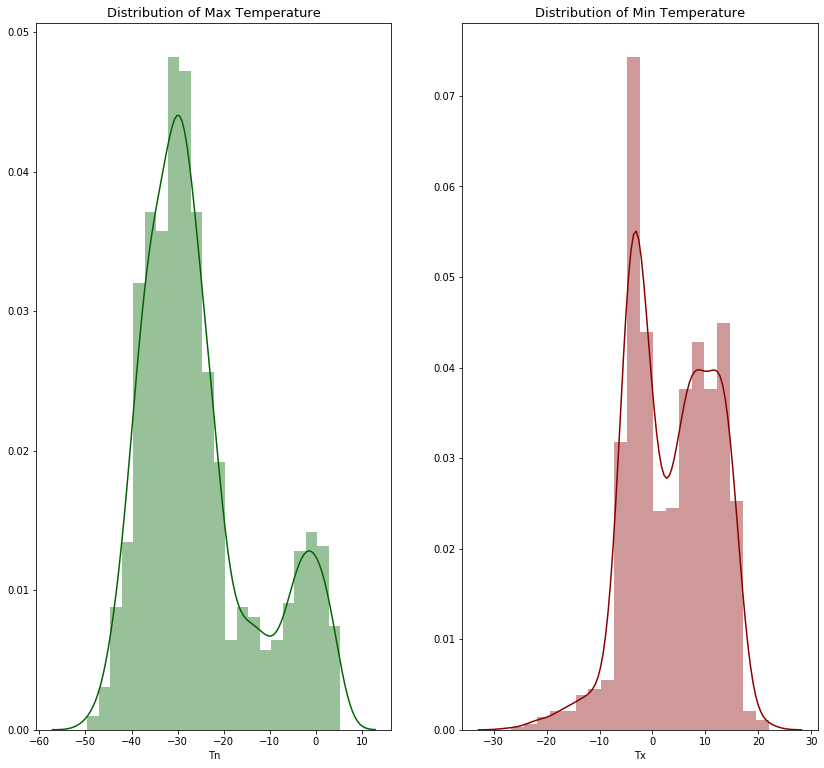

In [0]:
plt.subplot(1,2,1)
sns.distplot(df['Tn'], color='darkgreen', kde=True)
plt.title("Distribution of Max Temperature", fontsize=13)
plt.subplot(1,2,2)
sns.distplot(df['Tx'], color='darkred', kde=True)
plt.title("Distribution of Min Temperature", fontsize=13)

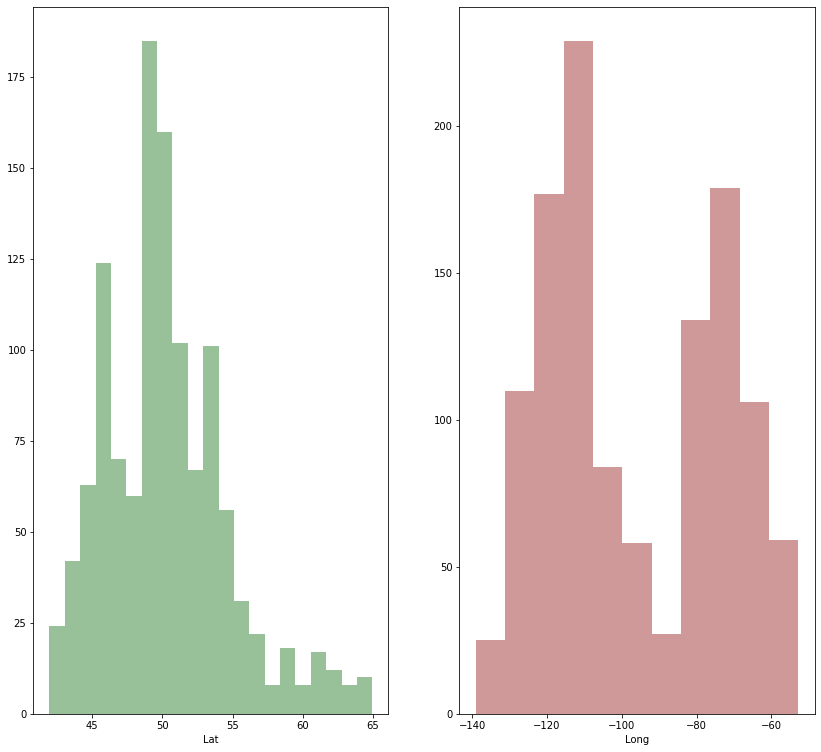

In [0]:
plt.subplot(1,2,1)
sns.distplot(df['Lat'], color='darkgreen', kde=False)
plt.subplot(1,2,2)
sns.distplot(df['Long'], color='darkred', kde=False)

Clustering of stations based on their location (Lat & Lon)

In [0]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = df[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df["Cluster_lab"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df[["Stn_Name","Tx","Tm","Cluster_lab"]].head(5)

,Stn_Name,Tx,Tm,Cluster_lab
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


Visualization of clusters based on location

Cluster number : 0, Average temperature: -5.538747553816051
Cluster number : 1, Average temperature: 1.9526315789473685
Cluster number : 2, Average temperature: -9.195652173913045
Cluster number : 3, Average temperature: -15.300833333333333
Cluster number : 4, Average temperature: -7.769047619047619


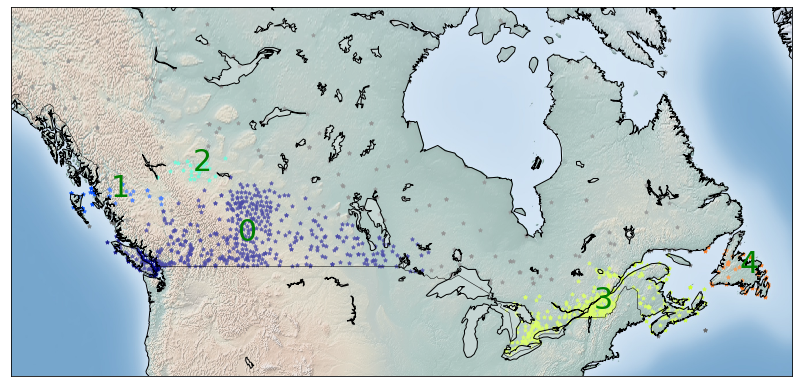

In [0]:
rcParams['figure.figsize'] = (14,13)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df[df.Cluster_lab == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='*', s= 14, alpha = 0.7)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='green',)
        print ("Cluster number : "+str(clust_number)+', Average temperature: '+ str(np.mean(clust_set.Tm)))

Clustering of stations based on their location, mean, max, and min Temperature

In [0]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = df[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
model = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_
df["Cluster_label"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df[["Stn_Name","Tx","Tm","Cluster_label"]].head(5)

,Stn_Name,Tx,Tm,Cluster_label
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


Visualization of clusters based on location and Temperture

Cluster number 0| Average temperature: -5.538747553816051
_____________________________________________________________________
Cluster number 1| Average temperature: 1.9526315789473685
_____________________________________________________________________
Cluster number 2| Average temperature: -9.195652173913045
_____________________________________________________________________
Cluster number 3| Average temperature: -15.300833333333333
_____________________________________________________________________
Cluster number 4| Average temperature: -7.769047619047619
_____________________________________________________________________
Cluster number 5| Average temperature: nan
_____________________________________________________________________
Cluster number 6| Average temperature: nan
_____________________________________________________________________
Cluster number 7| Average temperature: nan
_____________________________________________________________________
Cluster number 8| Av

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


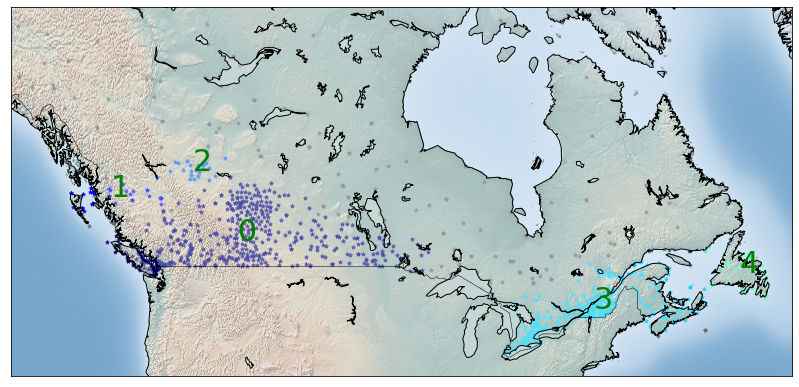

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,13)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df[df.Cluster_lab == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='*', s= 14, alpha = 0.7)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='green',)
        print ("Cluster number "+str(clust_number)+'| Average temperature: '+ str(np.mean(clust_set.Tm)))
        print('_____________________________________________________________________')

In [0]:
print("yassine zayani")

yassine zayani
